In [1]:
using GynC
using JLD

cookie: 5zg3wYT1gWUYWAce
VERSION: 0.5.0
worker_arg: `--worker 5zg3wYT1gWUYWAce`


In [2]:
import PyPlot
PyPlot.matplotlib["use"]("Agg")

In [3]:
ss=GynC.readsamples("/datanumerik/bzfsikor/gync/master");

In [ ]:
all = vcat([s.samples for s in ss if !isequal(datas[patient], s.config.patient.data)]...);
samples = all[1:10000:end,:];
@show size(samples,1)
m=GynC.gyncmodel([samples[i,:] for i=1:size(samples,1)], GynC.alldatas(), zmult = 50)
@show length(m.xs)
w0 = GynC.uniformweights(m.xs|>length);
wsmple=Dict()
@time for r in [0, 10/11, 30/31, 50/51, 100/101, 1]
    wsmple[r] = GynC.optimmple(m, r, w0)
end

In [41]:
@save "master2.jld" samples m wsmple

In [3]:
@load "master2.jld"

3-element Array{Symbol,1}:
 :m      
 :samples
 :wsmple 

In [18]:
using KernelDensity
Plots.gr()
Plots.plot()
for (l,v) in wsmple
  k = kde(map(x->x[8], m.xs), weights=v, bandwidth=0.5)
  Plots.plot!(k.x|>collect, k.density, label=string(l))
end
Plots.plot!()

LoadError: UndefVarError: wsmple not defined

In [7]:
include("../scripts/gyncplots.jl");

In [8]:
n = length(m.xs)
ms = GynC.smoothedmodel(m, 50)

In [ ]:
ws = Dict()

In [9]:
muni = gyncmodel(vcat(samplepi0(n*5, trajts), m.xs), m.datas, zmult=0);
@time ws["uni"] = [inverseweights(muni.xs)]

stds[densspecies] = [20.2505]
160.183138 seconds (25.44 M allocations: 69.815 GB, 39.05% gc time)


1-element Array{Array{Float64,1},1}:
 [0.000247116,0.000243039,0.000249429,0.000247597,0.000249,0.000248026,0.000249748,0.000249982,0.000248392,0.000246515  …  0.000133707,0.000156811,7.5798e-5,9.36085e-5,8.96415e-5,0.000129275,9.71836e-5,0.000175781,8.22709e-5,9.70905e-5]

In [42]:
ws["MPLE"] = [wsmple[100/101]];

In [11]:
w0 = GynC.uniformweights(m.xs|>length);

In [12]:
ws["NPMLE"] = [GynC.optimmple3(m, 0, w0)];

computing likelihood matrix (53x2598) (3.581617312 seconds)
f: sum(x)=1.000000 f(x)=1165.082340 outliers=0 
f: sum(x)=0.783628 f(x)=1652.750888 outliers=0 
f: sum(x)=0.784078 f(x)=1652.414253 outliers=0 
f: sum(x)=0.788464 f(x)=1631.905978 outliers=0 
f: sum(x)=0.827537 f(x)=1485.700824 outliers=0 
f: sum(x)=0.949333 f(x)=1048.372549 outliers=0 
f: sum(x)=0.998292 f(x)=1044.197687 outliers=0 
f: sum(x)=0.999985 f(x)=1043.267753 outliers=0 
f: sum(x)=0.999471 f(x)=1038.583294 outliers=0 
f: sum(x)=0.994214 f(x)=1034.141762 outliers=0 
f: sum(x)=0.991847 f(x)=1039.012956 outliers=0 
f: sum(x)=0.998876 f(x)=1033.645101 outliers=0 
f: sum(x)=0.999957 f(x)=1032.951357 outliers=0 
f: sum(x)=0.998779 f(x)=1031.408194 outliers=0 
f: sum(x)=0.993851 f(x)=1056.415105 outliers=0 
f: sum(x)=0.999498 f(x)=1031.351022 outliers=0 
f: sum(x)=0.998805 f(x)=1032.048837 outliers=0 
f: sum(x)=0.999843 f(x)=1031.110602 outliers=0 
f: sum(x)=0.999994 f(x)=1031.033295 outliers=0 
f: sum(x)=0.999841 f(x)=1031

In [15]:
ws["DS-MLE"] = [GynC.optimmple3(ms, 0, w0)];

computing likelihood matrix (2650x2598) (60.096457576 seconds)
f: sum(x)=1.000000 f(x)=52268.844287 outliers=0 
f: sum(x)=0.877506 f(x)=67089.225819 outliers=0 
f: sum(x)=0.877521 f(x)=67088.270555 outliers=0 
f: sum(x)=0.877670 f(x)=67078.961049 outliers=0 
f: sum(x)=0.879145 f(x)=66149.617434 outliers=0 
f: sum(x)=0.891964 f(x)=65025.840313 outliers=0 
f: sum(x)=0.948031 f(x)=53489.342451 outliers=0 
f: sum(x)=0.989513 f(x)=49029.673305 outliers=0 
f: sum(x)=0.999796 f(x)=48886.947817 outliers=0 
f: sum(x)=0.998319 f(x)=48627.722542 outliers=0 
f: sum(x)=0.811540 f(x)=98071.525956 outliers=0 
f: sum(x)=0.988994 f(x)=49296.703638 outliers=0 
f: sum(x)=0.998438 f(x)=48742.264116 outliers=0 
f: sum(x)=0.999732 f(x)=48645.249199 outliers=0 
f: sum(x)=0.999949 f(x)=48620.943858 outliers=0 
f: sum(x)=0.999999 f(x)=48612.515086 outliers=0 
f: sum(x)=0.999934 f(x)=48568.320119 outliers=0 
f: sum(x)=0.997956 f(x)=48589.206207 outliers=0 
f: sum(x)=0.999656 f(x)=48519.781852 outliers=0 
f: sum

computing likelihood matrix (5143x1) (0.196755562 seconds)
maximum(weights) = 0.00025091168747132687
maximum(weights) = 0.35928670211903235
computing likelihood matrix (2598x1) (0.096316124 seconds)
maximum(weights) = 0.022989773463099165
maximum(weights) = 0.999999999850299
maximum(weights) = 0.01887011160414785
maximum(weights) = 0.6714389412853159
maximum(weights) = 0.019588298692892497
maximum(weights) = 0.8969454630136843



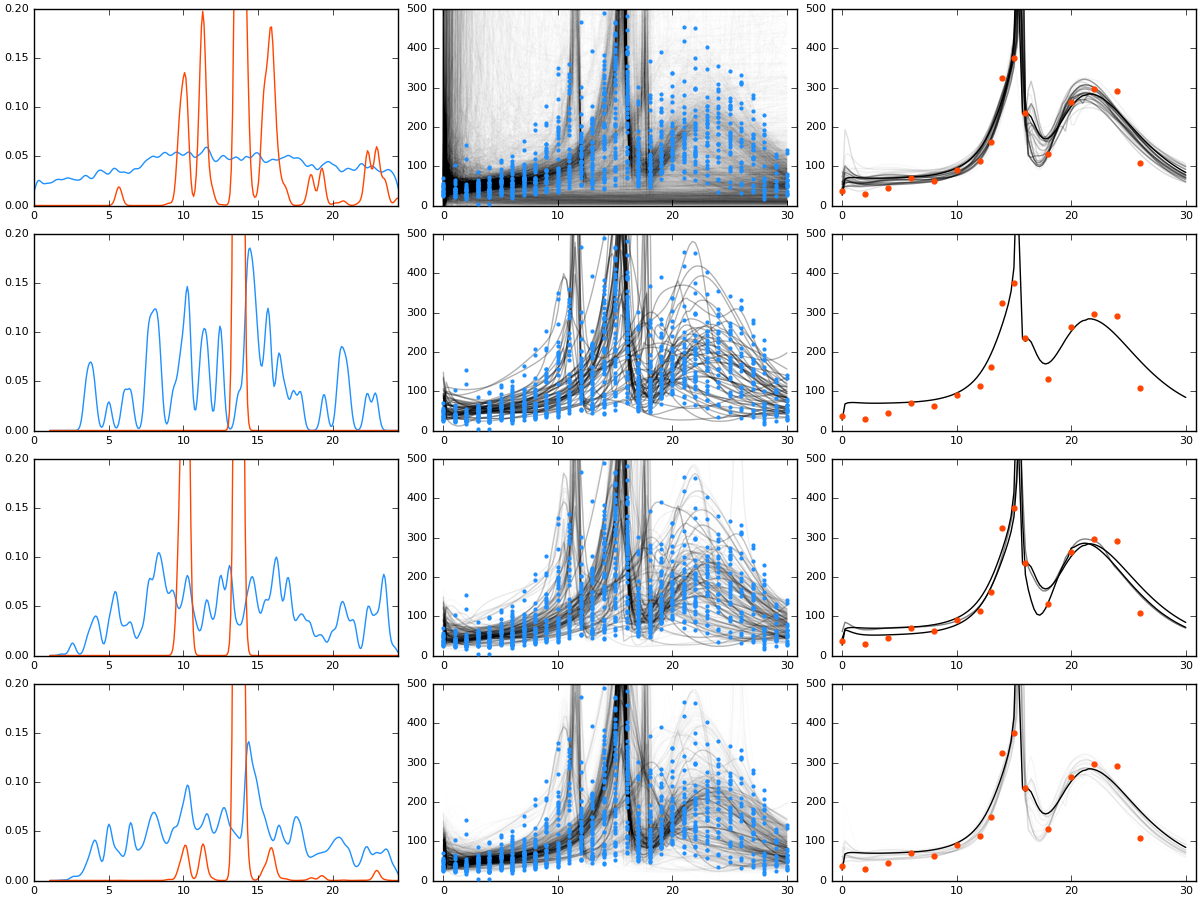

In [19]:
#gr(fmt=:png)
pyplot(fmt=:png)
patient = 20
denskdebw = 0.2
trajalphauni=30
#trajspecies = 4
denscolor = :dodgerblue
postcolor = :orangered
datacolor = :orangered
p=paperplot(m, muni, ws)

In [72]:
GynC.samplednames[[8,31]]

2-element Array{String,1}:
 "blood volume"                              
 "transition rate constant from PrA2 to SeF1"

In [74]:
GynC.measuredspeciesname.([3,1])

2-element Array{String,1}:
 "Estradiol in blood"
 "LH in blood"       

In [68]:
ylimsdens=[(0,0.35)]
denskdebw=0.1

0.1

maximum(weights) = 0.00025091168747132687
maximum(weights) = 0.14766494089664378
maximum(weights) = 0.022989773463099165
maximum(weights) = 0.9999999996847514
maximum(weights) = 0.01887011160414785
maximum(weights) = 0.4392517202611517
maximum(weights) = 0.014340032568608538
maximum(weights) = 


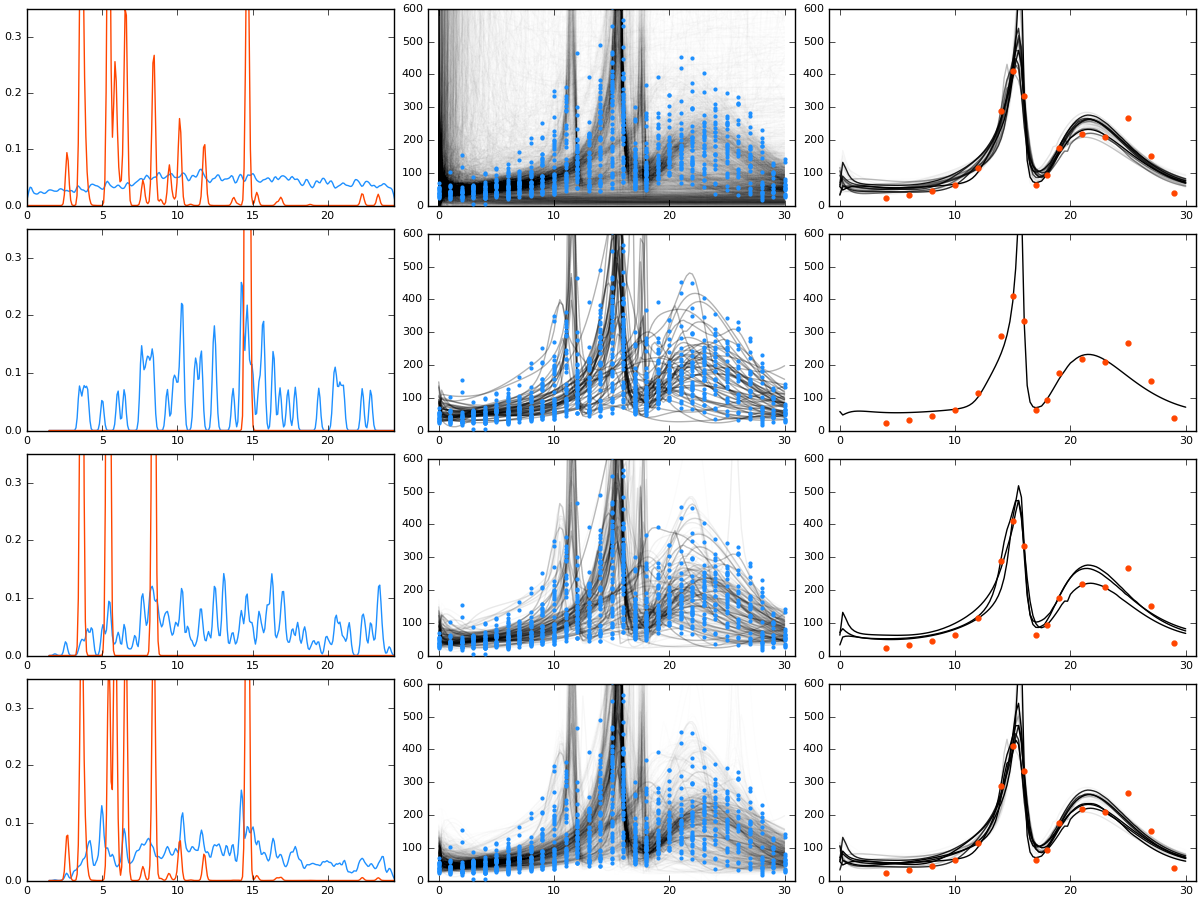

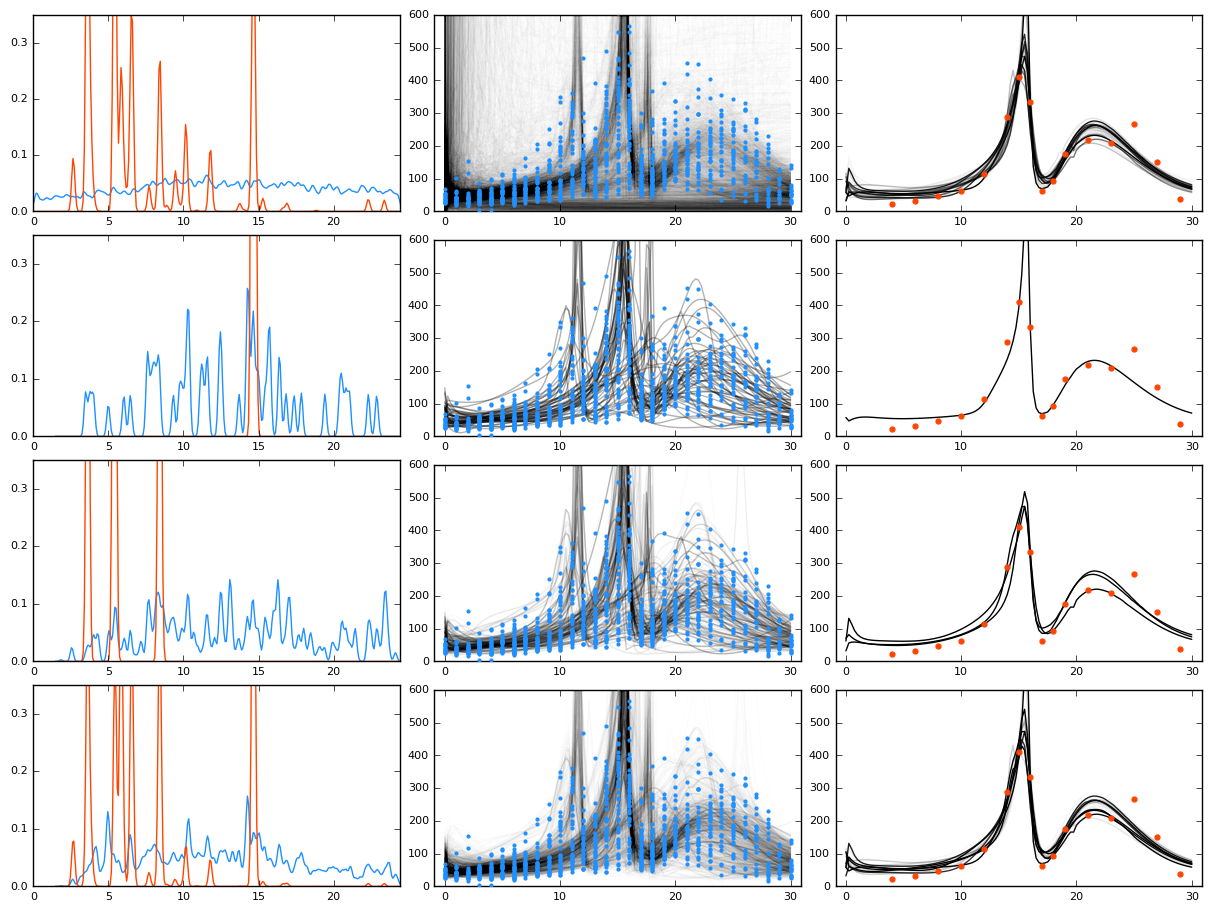

0.2587682994570103


In [69]:
patient=14
densspecies=[31]
trajspecies=3

ylimstraj=(0,600)
paperplot(m,muni,ws)|>display
savefig("master1.pdf")

maximum(weights) = 0.00025091168747132687
maximum(weights) = 0.14766494089664378
maximum(weights) = 0.022989773463099165
maximum(weights) = 0.9999999996847514
maximum(weights) = 0.01887011160414785
maximum(weights) = 0.4392517202611517
maximum(weights) = 0.014340032568608538
maximum(weights) = 


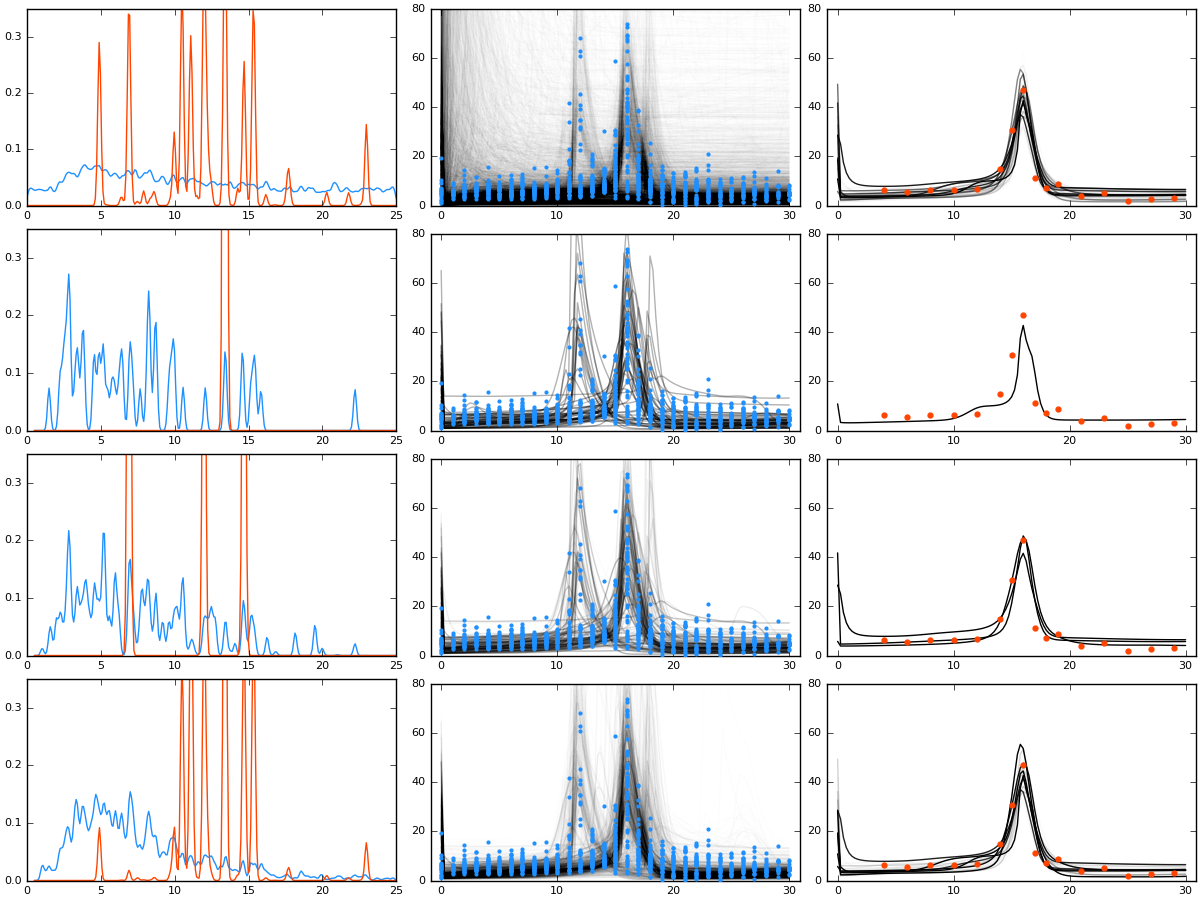

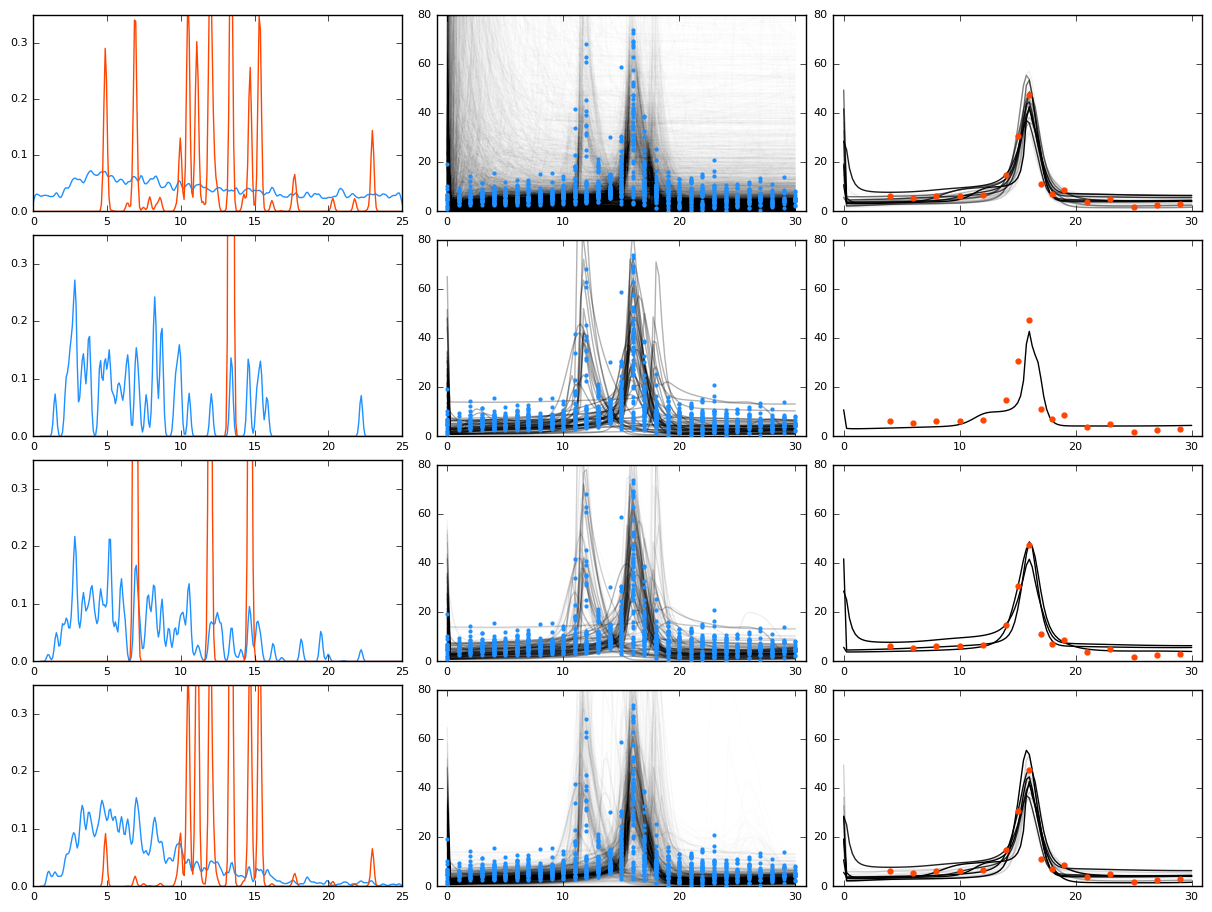

0.2587682994570103


In [70]:
patient = 14
densspecies=[8]
trajspecies = 1

ylimstraj=(0,80)
paperplot(m,muni,ws)|>display
savefig("master2.pdf")

maximum(weights) = 0.00025091168747132687
maximum(weights) = 0.2684532114951105
maximum(weights) = 0.022989773463099165
maximum(weights) = 0.9999999997803006
maximum(weights) = 0.01887011160414785
maximum(weights) = 0.8205249955262981
maximum(weights) = 0.014340032568608538
maximum(weights) = 


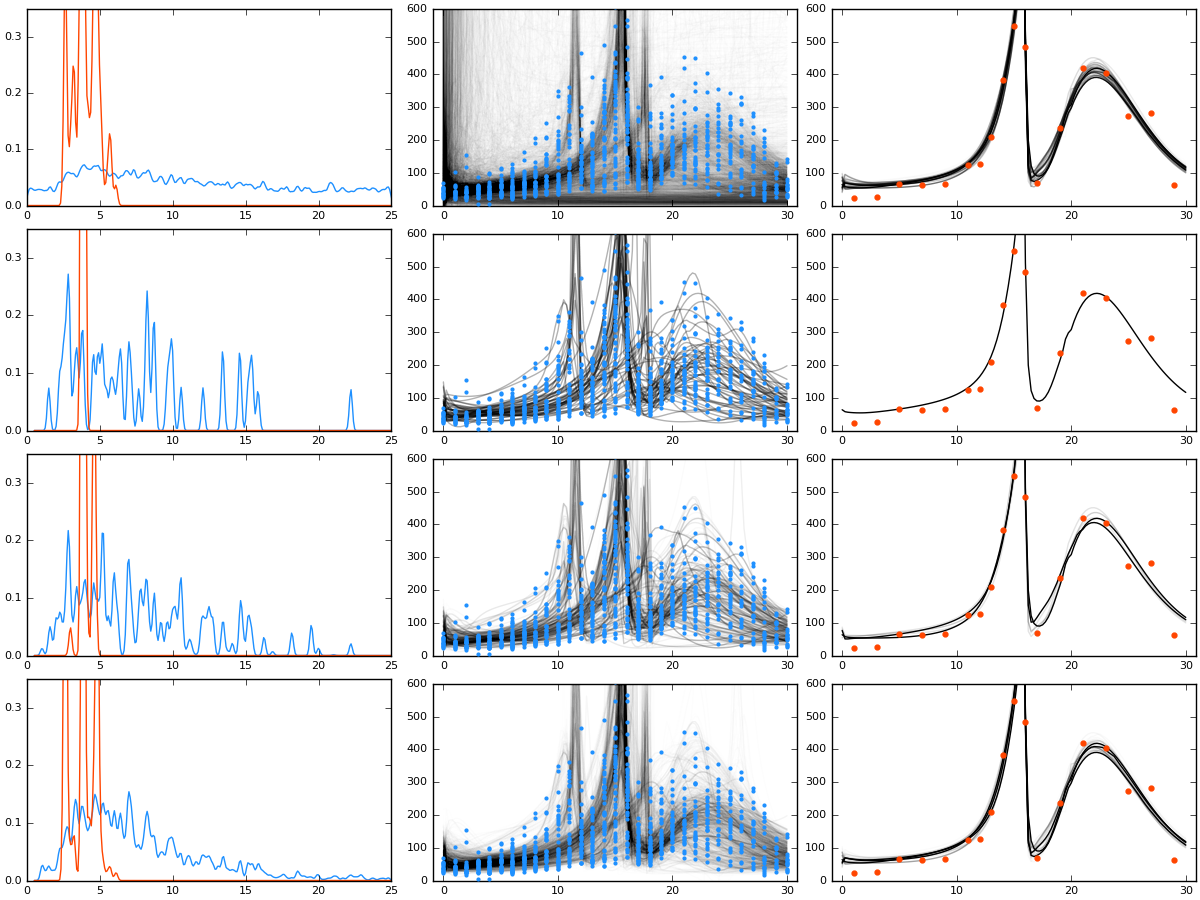

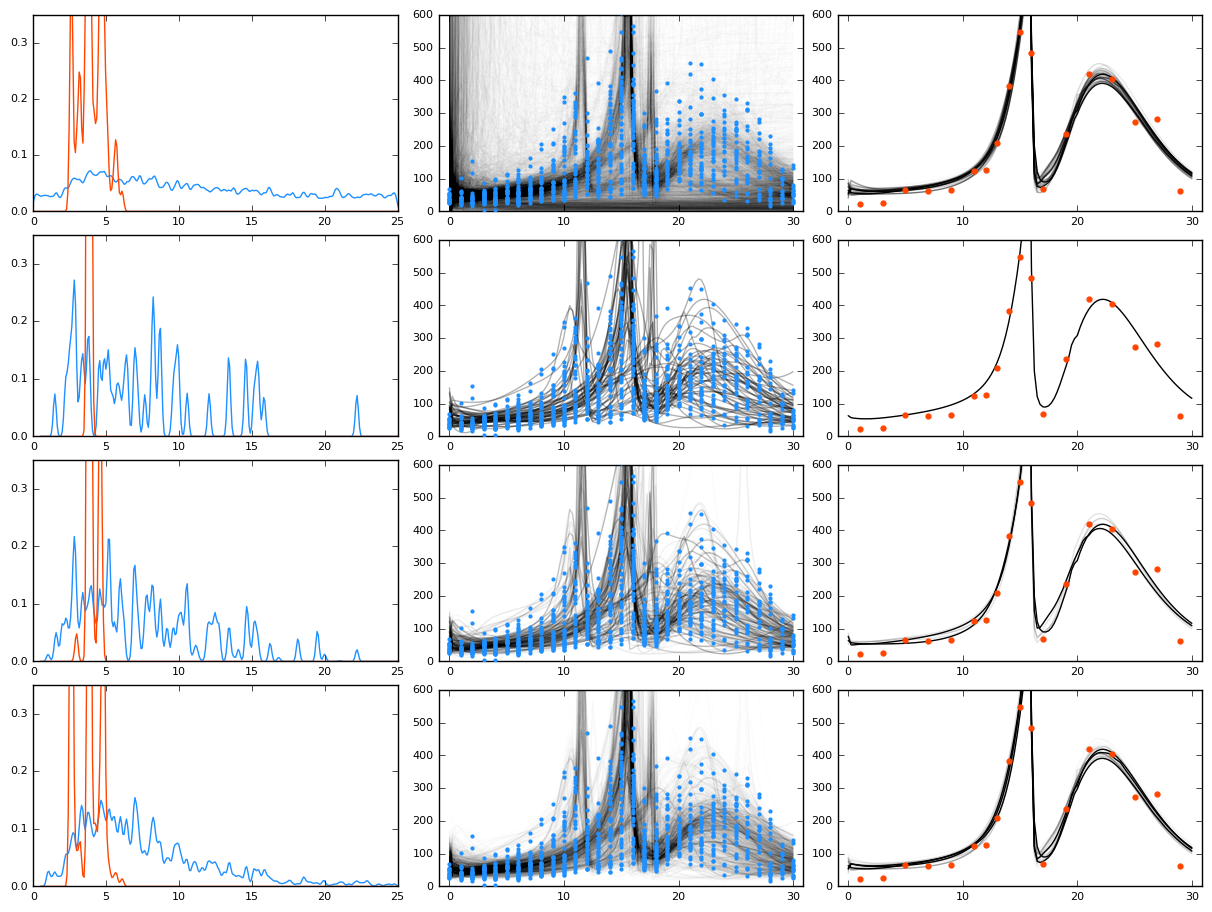

In [71]:
patient=13
densspecies=[8]
trajspecies=3

ylimstraj=(0,600)

paperplot(m,muni,ws)|> display
savefig("master3.pdf")